In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'cage_benchmark',
        root = '..'
    )

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

df_benchmark = list()
cutoffs = dict()

for i in map(Path, snakemake.input['pr']):
    sample = i.name.replace('.csv', '').replace('pr_curve_', '')
    _df = pd.read_csv(i).assign(sample=sample)
    cutoffs[sample] = _df[_df['replicated']].iloc[0]
    df_benchmark.append(_df)
    
df_benchmark = pd.concat(df_benchmark)

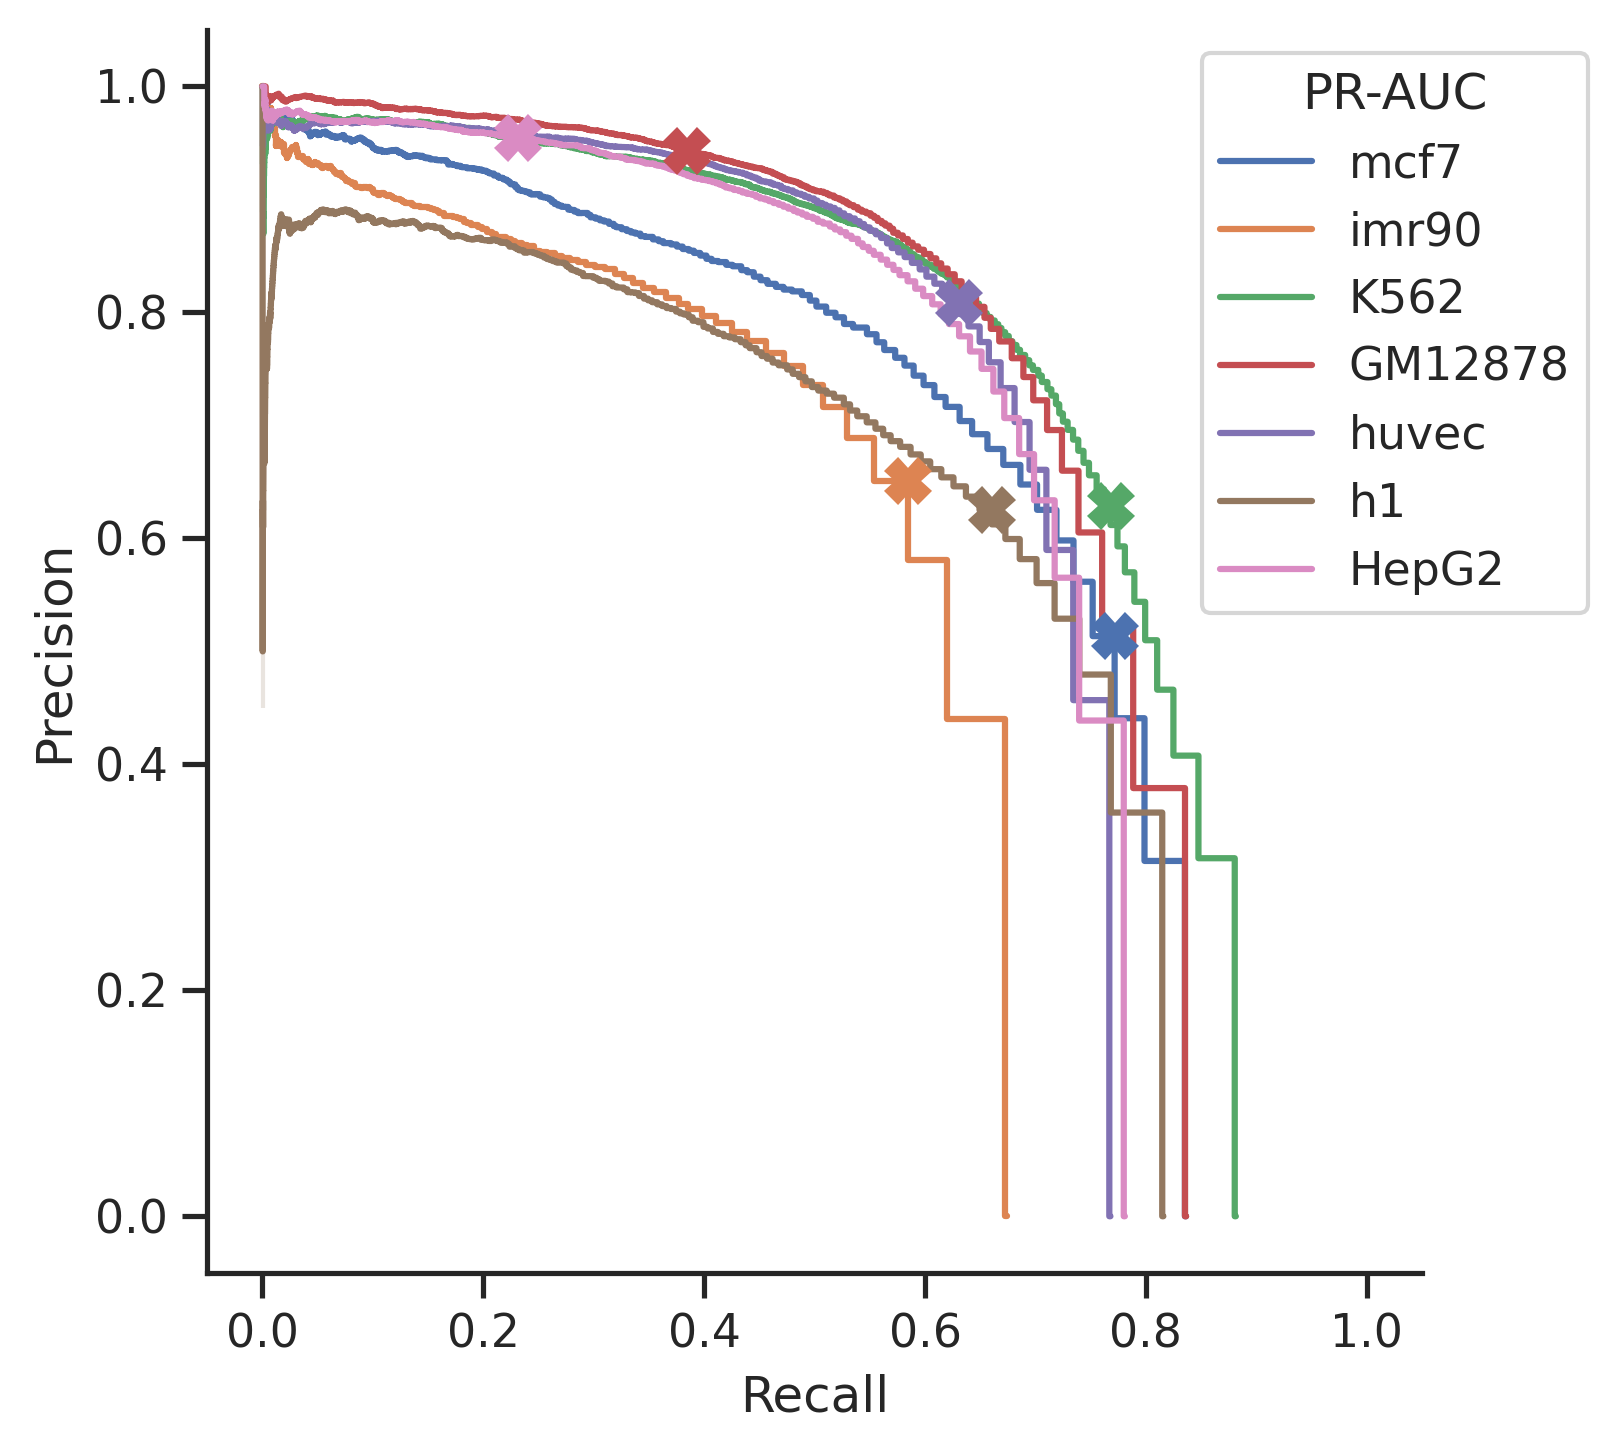

In [5]:
plt.figure(figsize=(5, 5), dpi=300)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

for sample in df_benchmark['sample'].unique():
    row = cutoffs[sample]
    plt.plot(row['Recall'], row['Precision'], 'X', markersize=10, zorder=10)

sns.lineplot(data=df_benchmark.drop_duplicates(['Precision', 'Recall', 'sample']).reset_index(), 
             y='Precision', x='Recall', hue='sample', drawstyle='steps-pre')

plt.legend()._legend_box.align='right'

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.8, 1.), loc='upper left', title='PR-AUC')

plt.savefig(snakemake.output['fig'], bbox_inches = "tight")

In [5]:
df_cutoff = pd.DataFrame(cutoffs.values())[['Precision', 'Recall', 'threshold', 'sample']]
df_cutoff.to_csv(snakemake.output['cutoffs'], index=False)

df_cutoff

,Precision,Recall,threshold,sample
140,0.954606,0.231462,139,HepG2
106,0.943239,0.384075,105,GM12878
8,0.625133,0.660423,7,h1
3,0.513489,0.771659,2,mcf7
10,0.808789,0.631070,9,huvec
3,0.650939,0.584885,2,imr90
9,0.628797,0.767954,8,K562
